In [266]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt 

In [267]:
# load training data
dataset_path = "/Users/denisefan/AnacondaProjects/sodaNoteBook/MachineLearning/dataset"
file_name = "watermelon.csv"
raw = pd.read_csv(os.path.join(dataset_path,file_name))
raw['norm']=np.ones((m,1))

# get label
labelMat = np.mat(raw['label'].values).transpose()
# get variables
dataMat = np.array(raw[['norm','density','saccharinity']].values)
m, n = dataMat.shape
# 17, 3

weights = np.array(np.ones((n,1)))


In [268]:
dataMat, weights, labelMat
dataMat.shape, weights.shape, labelMat.shape
# ((17, 3), (3, 1), (17, 1))
# np.dot(dataMat,weights) 

((17, 3), (3, 1), (17, 1))

In [269]:
def sigmoid(inX):
    return 1/(1 + np.exp(-inX))    

In [270]:

def gradAscent(dataMat,labelMat):  
    m,n=dataMat.shape  
    alpha=0.1  
    maxCycles=500  
    weights=np.array(np.ones((n,1)))  
  
    for k in range(maxCycles):   
        a=np.dot(dataMat,weights)  
        h=sigmoid(a)  
        error=(labelMat-h)  
        weights=weights+alpha*np.dot(dataMat.transpose(),error) 
    return weights

In [271]:
gradAscent(dataMat,labelMat) #（-2.839016, 1.04225,11.0011 ）

matrix([[ -2.83901628],
        [  1.04225909],
        [ 11.0011333 ]])

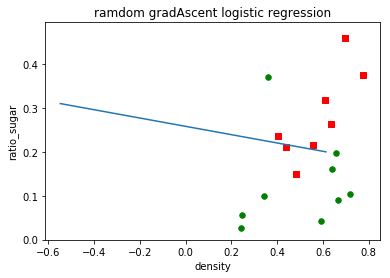

In [285]:
def plotBestFit(weights):  
    m=dataMat.shape[0]  
    xcord1=[]  
    ycord1=[]  
    xcord2=[]  
    ycord2=[]  
    for i in range(m):  
        if labelMat[i]==1:  
            xcord1.append(dataMat[i,1])  
            ycord1.append(dataMat[i,2])  
        else:  
            xcord2.append(dataMat[i,1])  
            ycord2.append(dataMat[i,2])  
    plt.figure(1)  
    ax=plt.subplot(111)  
    ax.scatter(xcord1,ycord1,s=30,c='red',marker='s')  
    ax.scatter(xcord2,ycord2,s=30,c='green')  
    x=np.arange(0.2,0.8,0.1)  
    y=np.array((-weights[0]-weights[1]*x)/weights[2]).transpose() 
    x_suger=np.arange(0.2,0.32,0.01)
    y_suger=np.array((-weights[0]-weights[2]*x_suger)/weights[1]).transpose() 
#     print x.shape, y.shape   
    plt.sca(ax)  
#     plt.plot(x,y)     #ramdomgradAscent  
    plt.plot(y_suger,x_suger)
    #plt.plot(x,y[0])   #gradAscent  
    plt.xlabel('density')  
    plt.ylabel('ratio_sugar')  
    #plt.title('gradAscent logistic regression')  
    plt.title('ramdom gradAscent logistic regression')  
    plt.show()  
  
weights=gradAscent(dataMat,labelMat)  
plotBestFit(weights)  

In [256]:
def gradDecent(dataMat, labelMat):
    m,n=dataMat.shape   
    weights=np.array(np.ones((n,1)))  
    alpha = 0.1
    max_loop = 500
    epsilon = 0.005
    tmp = weights
    for i in range(max_loop):
        h = sigmoid(np.dot(dataMat, weights))
        error = labelMat - h
        weights = weights + alpha*np.dot(dataMat.transpose(),error)
        print abs(weights - tmp)
        if sum(abs(weights - tmp) < np.array([[epsilon], [epsilon], [epsilon]])) > 1:
            print("round: %s" % i)
            break
        else: tmp = weights
        
    print("finish!") 
   
    return weights

In [257]:
weights_1 = gradDecent(dataMat, labelMat)
weights_1

[[ 0.63997623]
 [ 0.3156515 ]
 [ 0.06807925]]
[[ 0.40941007]
 [ 0.19403408]
 [ 0.02399432]]
[[ 0.2135528 ]
 [ 0.08900476]
 [ 0.01448302]]
[[ 0.10656419]
 [ 0.0313354 ]
 [ 0.0356736 ]]
[[ 0.05755054]
 [ 0.00502275]
 [ 0.04524459]]
[[ 0.03590109]
 [ 0.0064226 ]
 [ 0.04927049]]
[[ 0.02632783]
 [ 0.01129771]
 [ 0.05083955]]
[[ 0.02203252]
 [ 0.01330152]
 [ 0.05133453]]
[[ 0.02004457]
 [ 0.01405205]
 [ 0.05136146]]
[[ 0.01906716]
 [ 0.01425598]
 [ 0.05118527]]
[[ 0.01853348]
 [ 0.01422225]
 [ 0.05092182]]
[[ 0.01819551]
 [ 0.01408604]
 [ 0.0506218 ]]
[[ 0.0179446 ]
 [ 0.01390655]
 [ 0.05030741]]
[[ 0.01773311]
 [ 0.01370971]
 [ 0.04998837]]
[[ 0.01754014]
 [ 0.0135069 ]
 [ 0.04966894]]
[[ 0.0173565 ]
 [ 0.01330307]
 [ 0.04935097]]
[[ 0.01717813]
 [ 0.01310041]
 [ 0.04903526]]
[[ 0.01700324]
 [ 0.01289984]
 [ 0.04872217]]
[[ 0.01683103]
 [ 0.01270176]
 [ 0.04841181]]
[[ 0.01666114]
 [ 0.01250632]
 [ 0.04810425]]
[[ 0.0164934 ]
 [ 0.01231358]
 [ 0.0477995 ]]
[[ 0.01632772]
 [ 0.01212354]
 [ 0

matrix([[-2.06385402],
        [ 1.23650675],
        [ 6.52778733]])

(7,) (7, 1)


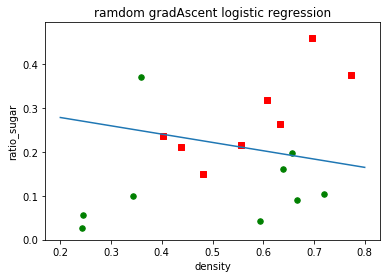

In [258]:
plotBestFit(weights_1) 